# Predicting Heart Disease Using Machine Learning
The notebook contains the predicting whether or not someone has heart disease on their medical attributes.

## Problem Definition

> Predicting whether a patient has heart disease, given the clinical parameters involved.

## Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. You can check out more information about the data, on UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

## Features Information
1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# import libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# load data
df = pd.read_csv("data\heart-disease.csv")

## Data Exploration

In [3]:
print(f"Row count: {df.shape[0]}, Column count: {df.shape[1]}")

Row count: 303, Column count: 14


In [4]:
# showing first 5 data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# showing last 5 data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# find out how many of each class there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

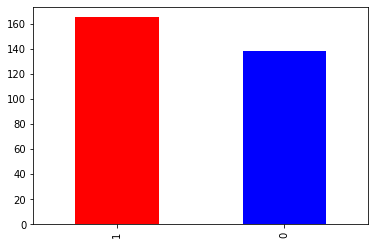

In [7]:
df.target.value_counts().plot(kind = "bar", color = ["red","blue"]);

In [8]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# describe the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


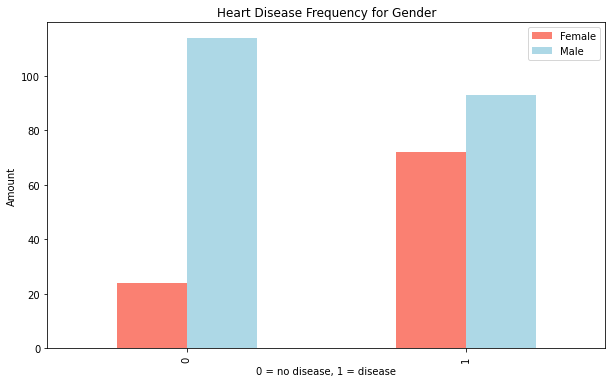

In [11]:
# compare target with gender
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

Based on this data set, heart disease is more common in men but it can be said that 75% of women have heart disease. This may be different in the real world.

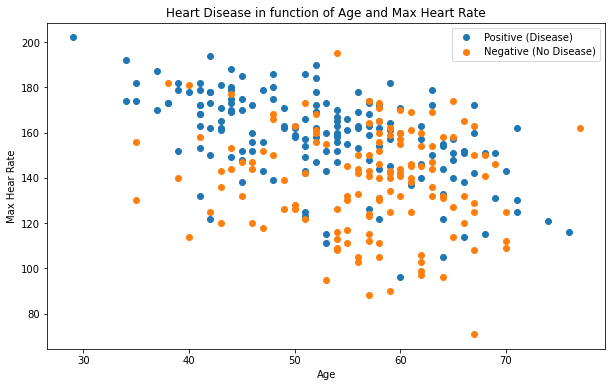

In [12]:
# Age vs max heart rate for heart disease
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])
# scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Hear Rate")
plt.legend(["Positive (Disease)", "Negative (No Disease)"]);

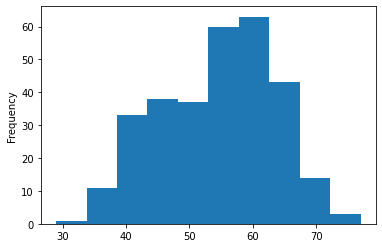

In [13]:
# Distribution of the age
df.age.plot.hist();

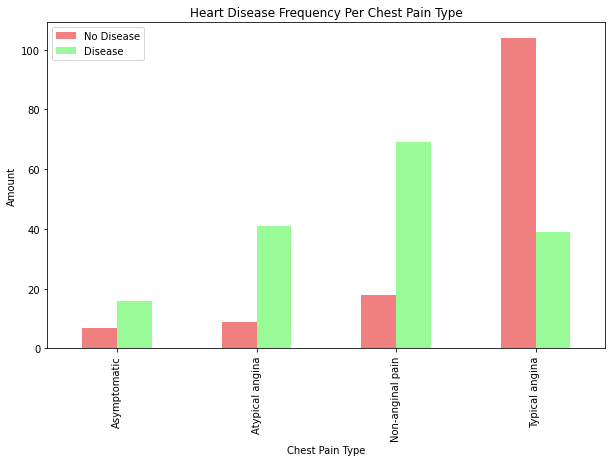

In [14]:
# heart disease frequency per chest pain type
pd.crosstab(df.cp.map({0:"Typical angina", 
                       1:"Atypical angina", 
                       2:"Non-anginal pain", 
                       3:"Asymptomatic"}), df.target).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ["lightcoral","palegreen"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

#### Remanding
**cp** - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

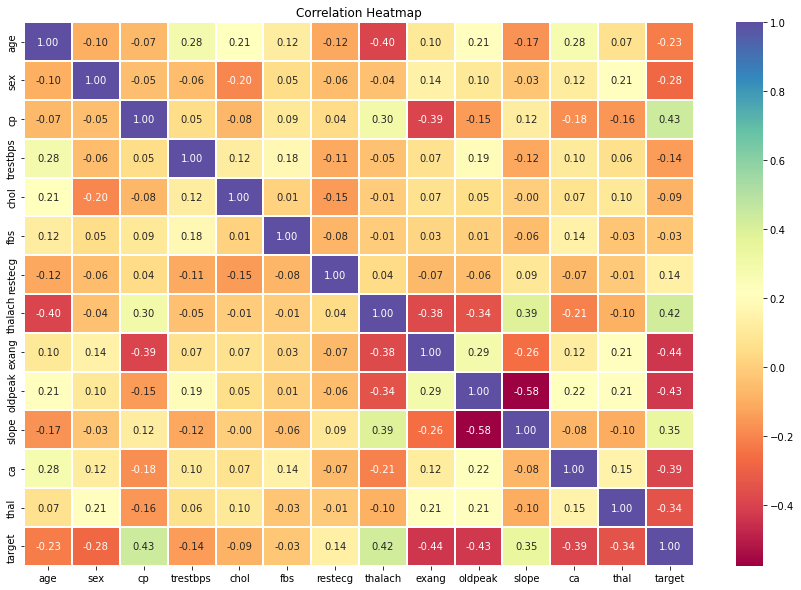

In [15]:
# correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths= 0.4, fmt = ".2f", cmap = "Spectral")
plt.title("Correlation Heatmap");

## Modelling
#### Preparing the data

In [16]:
# splitting data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### Creating models

In [17]:
# put the models in a dict
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    # set random seed
    np.random.seed(42)
    # create a dict for keeping model scores
    model_scores = {}
    for model_name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # add the scores the dict
        model_scores[model_name] = model.score(X_test, y_test)
    
    return model_scores

In [18]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\mahsu\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

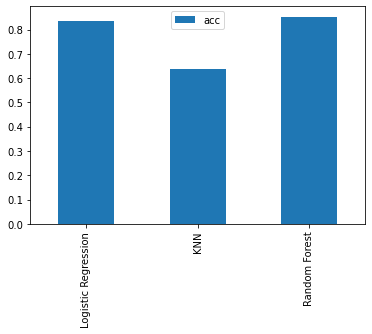

In [19]:
# visualing model comparison
model_compare = pd.DataFrame(model_scores, index = ["acc"])
model_compare.T.plot.bar();

#### Hyperparameter Tuning

In [20]:
# Tune KNN
scores_train = []
scores_test = []

neighbors = range(1,21)

# setup KNN
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    # add train scores
    scores_train.append(knn.score(X_train, y_train))
    
    # add test scores
    scores_test.append(knn.score(X_test, y_test))

Max KNN score on the test data: %75.41


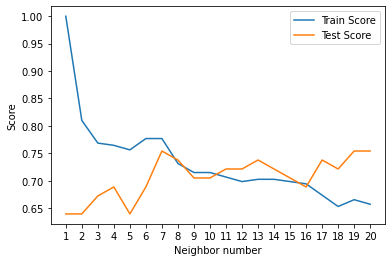

In [21]:
plt.plot(neighbors, scores_train, label = "Train Score")
plt.plot(neighbors, scores_test, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Neighbor number")
plt.ylabel("Score")
plt.legend()

print(f"Max KNN score on the test data: %{max(scores_test)*100:.2f}")

#### Hyperparameter Tuning with `RandomizedSearchCV`

In [22]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

# for Random Forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [23]:
# Tune Logistic Regression
# Setup random seed
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
# check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
# score
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [26]:
# Tune Random Forest
# Setup random seed
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
# check the best parameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [28]:
# score
rs_rf.score(X_test, y_test)

0.8688524590163934

#### Hyperparameter Tuning with `GridSearchCV`

In [29]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 6, 10),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=10,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.29154967e-03, 1.66810054e-02, 2.15443469e-01,
       2.78255940e+00, 3.59381366e+01, 4.64158883e+02, 5.99484250e+03,
       7.74263683e+04, 1.00000000e+06]),
                         'solver': ['liblinear']},
             verbose=True)

In [30]:
# check the best parameters
gs_log_reg.best_params_

{'C': 2.782559402207126, 'solver': 'liblinear'}

In [31]:
# score
gs_log_reg.score(X_test, y_test)

0.8032786885245902

## Evaluating the Tunned Model

In [32]:
# predictions
y_pred = gs_log_reg.predict(X_test)

C:\Users\mahsu\anaconda3\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


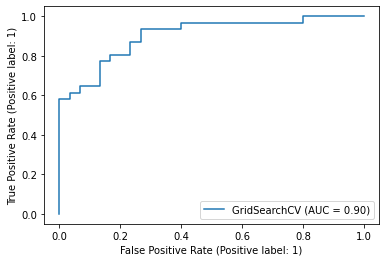

In [33]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

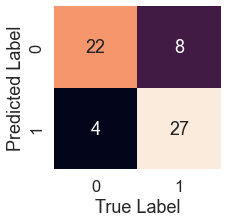

In [34]:
# confusion matrix on test data
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

In [35]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Calculate evaluation metrics using cross-validation

In [36]:
# new model with the best parameters
clf = LogisticRegression(C = gs_log_reg.best_params_["C"], 
                        solver = gs_log_reg.best_params_["solver"])

In [37]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8248633879781421

In [38]:
# cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [39]:
# cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8188009641520078

In [40]:
# cross-validated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

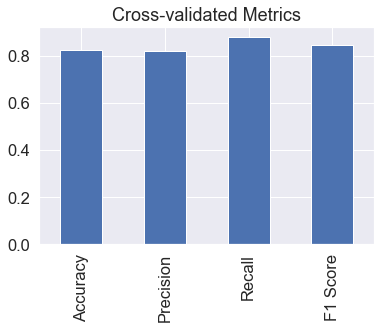

In [41]:
# visualize cross-validated metrics
metrics = {"Accuracy": cv_acc, 
           "Precision": cv_precision, 
           "Recall": cv_recall, 
           "F1 Score": cv_f1}

df_metrics = pd.DataFrame(metrics, index = [0])
df_metrics.T.plot.bar(legend = False)
plt.title("Cross-validated Metrics");

#### Feature Importance

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
clf = LogisticRegression(C = gs_log_reg.best_params_["C"], 
                        solver = gs_log_reg.best_params_["solver"])
clf.fit(X_train, y_train)

LogisticRegression(C=2.782559402207126, solver='liblinear')

In [44]:
# check the coef features
feature_coef = dict(zip(df.columns, list(clf.coef_[0])))
df_feature_coef = pd.DataFrame(feature_coef, index = ["Coefficient"])
df_feature_coef.T

,Coefficient
age,0.000725
sex,-1.420808
cp,0.864361
trestbps,-0.013572
chol,-0.005917
fbs,0.204274
restecg,0.351192
thalach,0.028783
exang,-0.868036
oldpeak,-0.316389


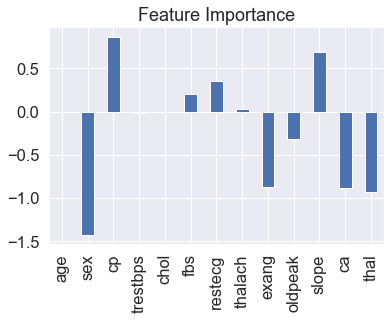

In [45]:
# visualize feature importance
df_feature_coef.T.plot.bar(legend = False)
plt.title("Feature Importance");